### Endpoints that we should be interested in

cities: provides a simple listing of cities within the platforms  

countries: provides a simple listing of countries within the platform  

fetches: providing data about individual fetch operations that are used to populate data in the platform  

latest: provides the latest value of each available parameter for every location in the system  

locations: provides a list of measurement locations and their meta data  

measurements: provides data about individual measurements  

parameters: provides a simple listing of parameters within the platform  

sources: provides a list of data sources

In [2]:
import openaq
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
api = openaq.OpenAQ()

status, resp = api.cities()

In [3]:
from pandas.io.json import json_normalize

df = json_normalize(resp)

In [4]:
df = api.latest(df=True)

In [5]:
df.head()

,averagingPeriod.unit,averagingPeriod.value,city,country,location,parameter,sourceName,unit,value
lastUpdated,,,,,,,,,
2019-03-19 06:00:00,hours,1.0,天津市,CN,淮河道,so2,ChinaAQIData,b'\xc2\xb5g/m\xc2\xb3',19.0
2019-03-19 06:00:00,hours,1.0,天津市,CN,淮河道,no2,ChinaAQIData,b'\xc2\xb5g/m\xc2\xb3',23.0
2019-03-19 06:00:00,hours,1.0,天津市,CN,淮河道,pm25,ChinaAQIData,b'\xc2\xb5g/m\xc2\xb3',76.0
2019-03-19 06:00:00,hours,1.0,天津市,CN,淮河道,pm10,ChinaAQIData,b'\xc2\xb5g/m\xc2\xb3',110.0
2019-03-19 07:00:00,hours,1.0,天津市,CN,淮河道,co,ChinaAQIData,b'\xc2\xb5g/m\xc2\xb3',600.0


In [6]:
resp = api.cities(df=True, limit = 10000)

In [7]:
resp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2649 entries, 0 to 2648
Data columns (total 4 columns):
city         2649 non-null object
count        2649 non-null int64
country      2649 non-null object
locations    2649 non-null int64
dtypes: int64(2), object(2)
memory usage: 82.9+ KB


In [8]:
resp.head(10)

,city,count,country,locations
0,Escaldes-Engordany,61407,AD,2
1,unused,3238,AD,1
2,Abu Dhabi,17963,AE,1
3,Dubai,10953,AE,1
4,Buenos Aires,14976,AR,4
5,Austria,121987,AT,174
6,Amt der Nieder�sterreichischen Landesregierung,322499,AT,39
7,Amt der Steierm�rkischen Landesregierung,320372,AT,41
8,"Gemeinde Wien, MA22 Umweltschutz",130328,AT,21
9,Amt der Ober�sterreichischen Landesregierung,154329,AT,16


In [9]:
print(resp.query("country == 'IN'"))

                   city    count country  locations
1237             Kanpur   205224      IN          3
1238          Hyderabad   770014      IN         16
1239            Lucknow   425743      IN          8
1240              Delhi  1976970      IN         79
1241          Jalandhar    14445      IN          1
1242        Muzaffarpur   156139      IN          3
1243            Bhiwadi    56892      IN          3
1244          Ahmedabad    99021      IN          3
1245             Jaipur   282504      IN          9
1246            Udaipur    69387      IN          2
1247       Kurukshetra       870      IN          1
1248            Narnaul      867      IN          1
1249               Gaya   117220      IN          2
1250          Ghaziabad   156259      IN          4
1251             Nagpur    88597      IN          6
1252            Baghpat    36494      IN          1
1253               Jind      822      IN          1
1254              Ajmer    55819      IN          4
1255        

In [10]:
res = api.countries(limit=10000, df= True)

In [11]:
res.head()

,cities,code,count,locations,name
0,2,AD,64645,3,Andorra
1,1,AR,14976,4,Argentina
2,21,AU,5374463,105,Australia
3,16,AT,1521351,306,Austria
4,1,BH,31561,1,Bahrain


In [12]:
res = api.parameters(df = True)

In [13]:
res.head()

,description,id,name,preferredUnit
0,Black Carbon,bc,BC,µg/m³
1,Carbon Monoxide,co,CO,ppm
2,Nitrogen Dioxide,no2,NO2,ppm
3,Ozone,o3,O3,ppm
4,Particulate matter less than 10 micrometers in...,pm10,PM10,µg/m³


In [14]:
loc = api.locations(df = True)

In [15]:
loc.head()

,city,coordinates.latitude,coordinates.longitude,count,country,firstUpdated,lastUpdated,location,parameters,sourceName,sourceNames
0,天津市,39.213300,117.18370,15437,CN,2018-10-17 12:00:00,2019-03-19 07:00:00,淮河道,"[so2, pm10, o3, co, no2, pm25]",ChinaAQIData,[ChinaAQIData]
1,Stockholm,NaN,NaN,241,SE,2018-03-27 22:00:00,2018-04-04 15:00:00,(Folkungagatan tillfälligt avstängd),"[pm10, no2]",Sweden,[Sweden]
2,Ulaanbaatar,47.917980,106.84806,5987,MN,2019-03-01 06:45:00,2019-03-13 21:45:00,1-r khoroolol,"[no2, pm10, co, so2, pm25]",Agaar.mn,[Agaar.mn]
3,Ulaanbaatar,47.932907,106.92139,372614,MN,2015-09-01 00:00:00,2019-03-13 22:00:00,100 ail,"[pm10, co, no2, so2, o3]",Agaar.mn,[Agaar.mn]
4,Omaha-Council Bluffs,41.322470,-95.93799,27904,US,2016-03-06 19:00:00,2019-04-15 20:00:00,16th and Whitmore,"[o3, so2]",AirNow,[AirNow]


In [16]:
loc.iloc[0]

city                                                天津市
coordinates.latitude                            39.2133
coordinates.longitude                           117.184
count                                             15437
country                                              CN
firstUpdated                        2018-10-17 12:00:00
lastUpdated                         2019-03-19 07:00:00
location                                            淮河道
parameters               [so2, pm10, o3, co, no2, pm25]
sourceName                                 ChinaAQIData
sourceNames                              [ChinaAQIData]
Name: 0, dtype: object

In [17]:
delhi_loc = api.locations(city = 'Delhi', df = True)

In [18]:
delhi_loc.head()

,city,coordinates.latitude,coordinates.longitude,count,country,firstUpdated,lastUpdated,location,parameters,sourceName,sourceNames
0,Delhi,28.815329,77.15301,4940,IN,2018-12-14 01:30:00,2019-02-14 04:45:00,"Alipur, Delhi - DPCC","[pm25, pm10, no2, o3, co, so2]",caaqm,[caaqm]
1,Delhi,28.650800,77.31520,102326,IN,2015-06-29 14:30:00,2017-11-28 10:15:00,Anand Vihar,"[pm10, o3, no2, pm25, so2, co]",CPCB,"[Anand Vihar, CPCB]"
2,Delhi,NaN,NaN,33714,IN,2017-11-27 18:35:00,2019-02-14 05:00:00,"Anand Vihar, Delhi - DPCC","[co, no2, so2, pm25, o3, pm10]",caaqm,"[data.gov.in, CPCB, caaqm]"
3,Delhi,28.652740,77.29779,172,IN,2018-03-09 03:30:00,2018-03-16 23:30:00,"Anand Vihar, New Delhi - DPCC","[pm25, so2, co, no2, pm10, o3]",data.gov.in,[data.gov.in]
4,Delhi,NaN,NaN,5511,IN,2018-03-20 03:30:00,2019-02-14 04:45:00,"Ashok Vihar, Delhi - DPCC","[co, so2, pm10, no2, o3, pm25]",caaqm,"[data.gov.in, caaqm]"


In [19]:
delhi_pm25 = api.locations(city = 'Delhi', parameter = 'pm25', df = True)
delhi_pm25.head()

,city,coordinates.latitude,coordinates.longitude,count,country,firstUpdated,lastUpdated,location,parameters,sourceName,sourceNames
0,Delhi,28.815329,77.15301,859,IN,2018-12-14 01:30:00,2019-02-14 04:45:00,"Alipur, Delhi - DPCC",[pm25],caaqm,[caaqm]
1,Delhi,28.650800,77.31520,23891,IN,2015-06-29 14:30:00,2017-11-28 10:15:00,Anand Vihar,[pm25],CPCB,"[CPCB, Anand Vihar]"
2,Delhi,NaN,NaN,6200,IN,2017-11-27 18:35:00,2019-02-14 05:00:00,"Anand Vihar, Delhi - DPCC",[pm25],caaqm,"[data.gov.in, caaqm, CPCB]"
3,Delhi,28.652740,77.29779,28,IN,2018-03-09 03:30:00,2018-03-16 23:30:00,"Anand Vihar, New Delhi - DPCC",[pm25],data.gov.in,[data.gov.in]
4,Delhi,28.695381,77.18166,966,IN,2018-03-20 03:30:00,2019-02-14 04:45:00,"Ashok Vihar, Delhi - DPCC",[pm25],caaqm,"[caaqm, data.gov.in]"


In [20]:
latest_del = api.latest(city='Delhi', parameter = 'pm25', df= True)
latest_del.head()

,averagingPeriod.unit,averagingPeriod.value,city,country,location,parameter,sourceName,unit,value
lastUpdated,,,,,,,,,
2019-02-14 04:45:00,hours,0.25,Delhi,IN,"Alipur, Delhi - DPCC",pm25,caaqm,b'\xc2\xb5g/m\xc2\xb3',194.0
2017-11-28 10:15:00,hours,0.25,Delhi,IN,Anand Vihar,pm25,CPCB,b'\xc2\xb5g/m\xc2\xb3',70.0
2019-02-14 05:00:00,hours,0.25,Delhi,IN,"Anand Vihar, Delhi - DPCC",pm25,caaqm,b'\xc2\xb5g/m\xc2\xb3',205.0
2018-03-16 23:30:00,hours,1.00,Delhi,IN,"Anand Vihar, New Delhi - DPCC",pm25,data.gov.in,b'\xc2\xb5g/m\xc2\xb3',166.0
2019-02-14 04:45:00,hours,0.25,Delhi,IN,"Ashok Vihar, Delhi - DPCC",pm25,caaqm,b'\xc2\xb5g/m\xc2\xb3',182.0


## And to extract all the data, use measurements

In [21]:
all_data = api.measurements(city = 'Delhi', parameter = 'pm25', limit= '10000', df= True)
all_data.groupby(['location'])['value'].describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
"Alipur, Delhi - DPCC",147.0,194.809524,39.556156,114.00,166.0000,196.000,224.0000,267.00
"Anand Vihar, Delhi - DPCC",152.0,219.407895,49.899018,119.00,182.0000,220.000,246.0000,385.00
"Ashok Vihar, Delhi - DPCC",150.0,214.900000,50.120894,101.00,186.0000,203.500,254.5000,323.00
"Aya Nagar, Delhi - IMD",88.0,114.798750,64.564209,0.00,84.9100,114.565,156.6125,259.10
"Bawana, Delhi - DPCC",150.0,244.346667,67.206782,151.00,195.2500,223.000,288.0000,425.00
"Burari Crossing, Delhi - IMD",99.0,163.605657,45.294948,71.72,123.4700,169.380,199.2750,264.84
"CRRI Mathura Road, Delhi - IMD",113.0,155.749823,37.618655,91.28,124.9300,158.230,185.6800,260.24
"DTU, Delhi - CPCB",143.0,201.291329,44.695646,127.80,164.8000,203.100,230.9700,343.50
"Dr. Karni Singh Shooting Range, Delhi - DPCC",110.0,169.500000,47.192316,86.00,139.0000,159.500,204.2500,276.00


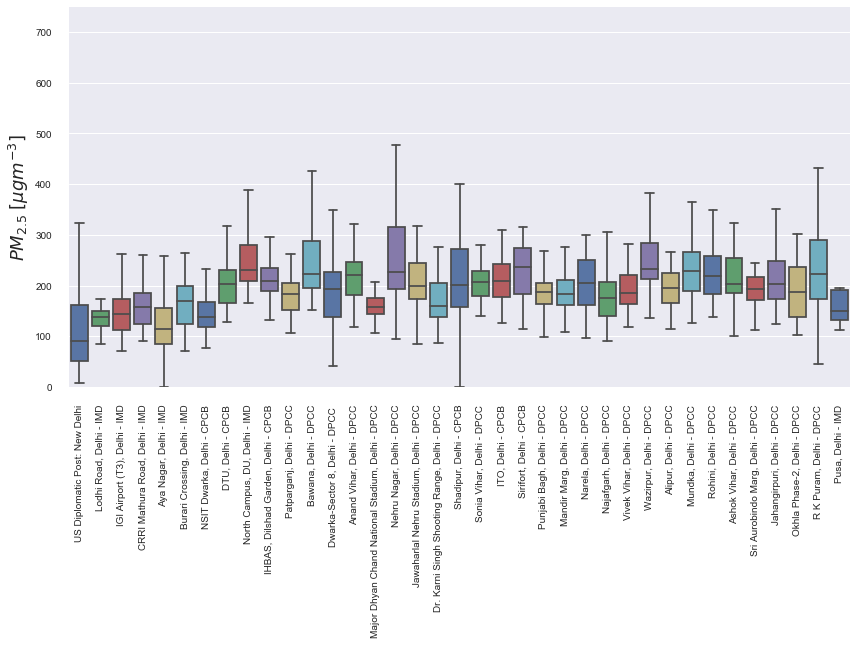

In [22]:
fig, ax = plt.subplots(1, figsize=(14,7))

for group, df in all_data.groupby('location'):
    _df = df.query("value >= 0.0").resample('1h').mean()
#     _df.value.plot(ax=ax, label=group)

ax = sns.boxplot(
    x='location',
    y='value',
    data=all_data.query("value >= 0.0"),
    fliersize=0,
    palette='deep',
    ax=ax)

ax.set_ylim([0, 750])
ax.set_ylabel("$PM_{2.5}\;[\mu gm^{-3}]$", fontsize=18)
ax.set_xlabel("")

sns.despine(offset=10)

plt.xticks(rotation=90)
plt.show()

In [23]:
r = api.measurements(city = 'Delhi', location = 'Anand Vihar, Delhi - DPCC', limit = 1000, df = True)
r.parameter.unique()

array(['pm25', 'co', 'o3', 'so2', 'no2'], dtype=object)

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


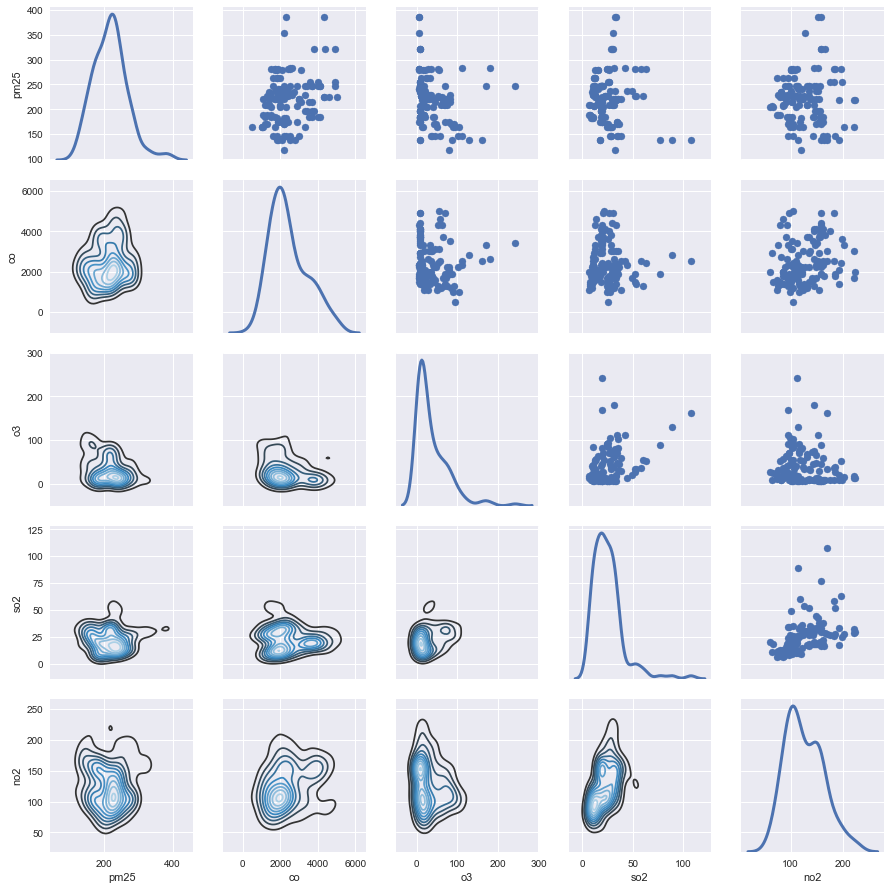

In [24]:
df = pd.DataFrame()

for u in r.parameter.unique():
    _df = r[r['parameter'] == u][['value']]
    _df.columns = [u]

    # Merge the dataframes together
    df = pd.merge(df, _df, left_index=True, right_index=True, how='outer')

# Get rid of rows where not all exist
df.dropna(how='any', inplace=True)

g = sns.PairGrid(df, diag_sharey=False)

g.map_lower(sns.kdeplot, cmap='Blues_d')
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

plt.show()


In [28]:
res = api.measurements(city='Hilo', parameter='so2', limit=10000, df=True)

# Print out the statistics on a per-location basiss
res.groupby(['location'])['value'].describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Hawaii Volcanoes NP,2075.0,0.001032,0.004027,0.0,0.000,0.000,0.000,0.054
Hilo,1941.0,0.001040,0.000684,0.0,0.001,0.001,0.001,0.008
Kona,2029.0,0.000860,0.000348,0.0,0.001,0.001,0.001,0.001
Ocean View,1962.0,0.000034,0.000194,0.0,0.000,0.000,0.000,0.002
Pahala,1993.0,0.001087,0.000887,0.0,0.001,0.001,0.001,0.016
